In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255., x_test/255.

print('x_train.shape: ', x_train.shape)

x_train.shape:  (60000, 28, 28)


In [6]:
# Convolution expects height x width x color but this data is only 2D!
x_train = np.expand_dims(x_train,  -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# Number of classes
K = len(set(y_train))
print('Number of classes: ', K)

Number of classes:  10


In [8]:
# Build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
# Compile and fit
# Note: make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7093 - accuracy: 0.7412 - val_loss: 0.4192 - val_accuracy: 0.8438
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3768 - accuracy: 0.8575 - val_loss: 0.3475 - val_accuracy: 0.8726
Epoch 3/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3169 - accuracy: 0.8783 - val_loss: 0.3195 - val_accuracy: 0.8833
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2820 - accuracy: 0.8959 - val_loss: 0.3050 - val_accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2520 - accuracy: 0.9045 - val_loss: 0.3152 - val_accuracy: 0.8884
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2239 - accuracy: 0.9153 - val_loss: 0.3030 - val_accuracy: 0.8902
Epoch 7/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2056 - accuracy: 0.9226 - val_loss: 0.2977 - val_ac

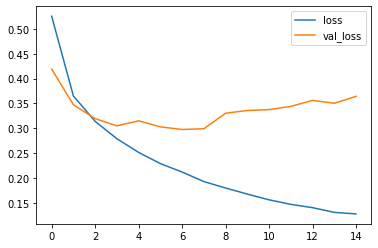

In [11]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

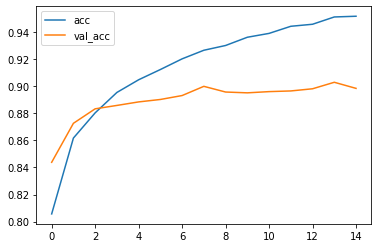

In [12]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without normalization
[[862   2  19  27   1   1  83   0   4   1]
 [  2 977   1  18   1   0   0   0   1   0]
 [ 15   1 852  13  48   0  71   0   0   0]
 [ 14   4  10 926  13   2  31   0   0   0]
 [  0   1  55  37 827   0  78   0   2   0]
 [  0   0   0   2   0 970   0  17   1  10]
 [127   0  62  29  84   0 686   0  12   0]
 [  0   0   0   0   0  18   0 958   1  23]
 [  3   0   4   4   4   3   3   1 977   1]
 [  1   0   0   1   0  10   0  39   0 949]]


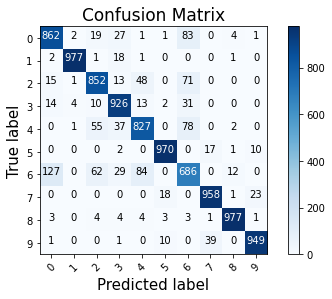

In [13]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):

    
    # This function prints and plots the confusion matrix.
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
        
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.figure()#figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted label', fontsize=15)
    plt.ylabel('True label', fontsize=15)
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [14]:
# Label mapping
labels = '''T-shirt/Top 
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

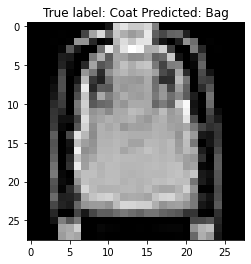

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));